In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [154]:
dft = pd.read_csv('cctech_classification_train.txt')

In [155]:
dft.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [156]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
1         1992 non-null float64
2         1992 non-null float64
3         1993 non-null float64
Target    1984 non-null object
dtypes: float64(3), object(1)
memory usage: 62.5+ KB


In [157]:
dft.shape

(1995, 4)

In [158]:
dft.isna().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [159]:
dft = dft.dropna()

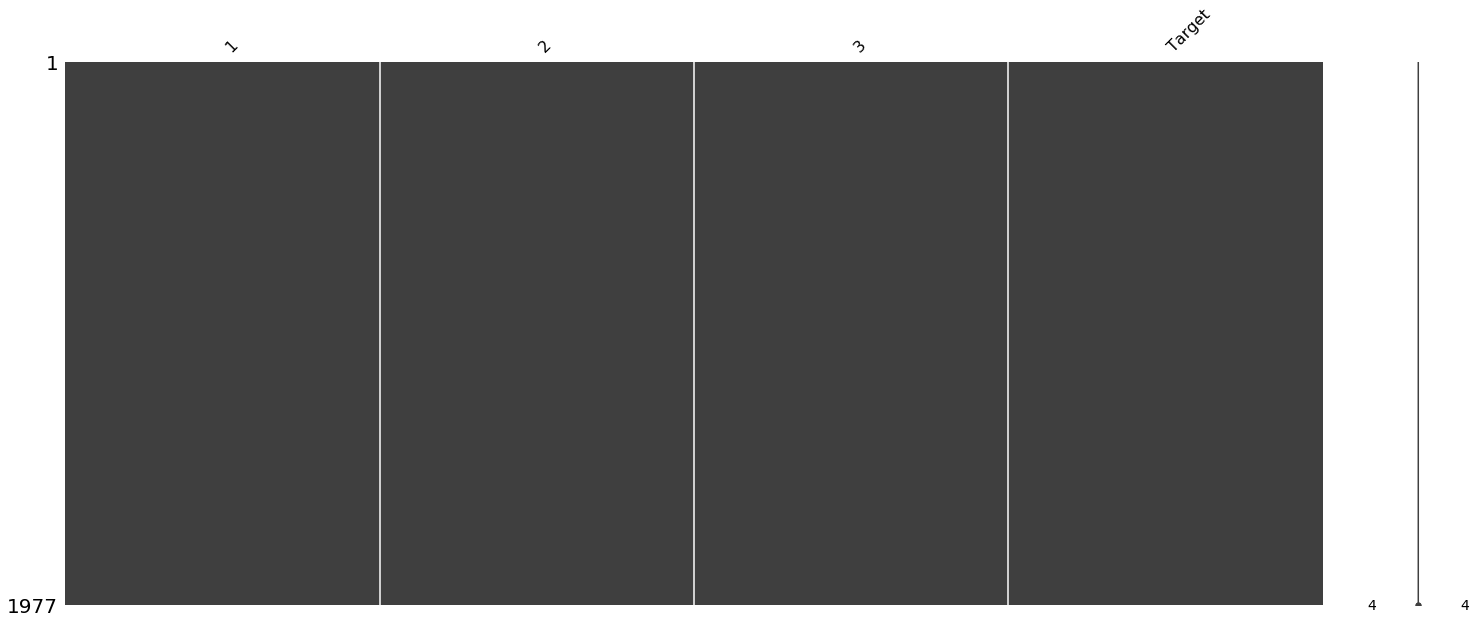

In [160]:
msn.matrix(dft)

In [161]:
# as there are very less missing data in the columns, we can directly drop them

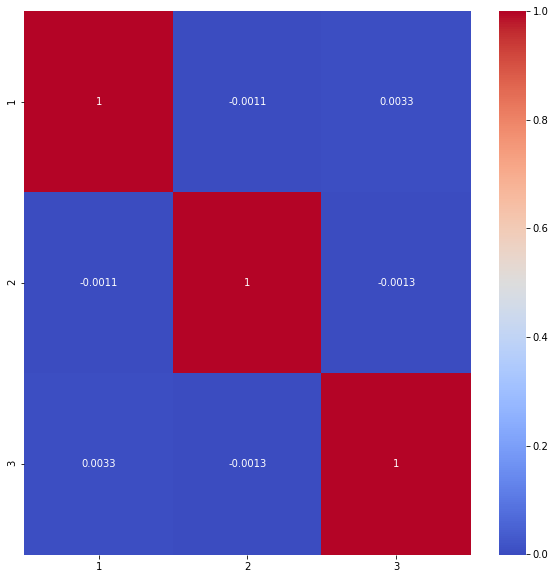

In [162]:
plt.figure(figsize=(10,10))
sns.heatmap(dft.corr(),annot=True,cmap='coolwarm')

In [163]:
dft.describe()

,1,2,3
count,1977.000000,1977.00000,1977.000000
mean,1.495751,1.75307,16.330298
std,22.229733,58.67799,42.576802
min,0.400000,0.10000,0.000000
25%,0.490000,0.15000,12.000000
50%,0.600000,0.22000,15.000000
75%,0.710000,0.30000,19.000000
max,600.000000,2600.00000,1900.000000


In [164]:
numerical_columns = dft.select_dtypes(exclude='object').columns
numerical_columns

Index(['1', '2', '3'], dtype='object')

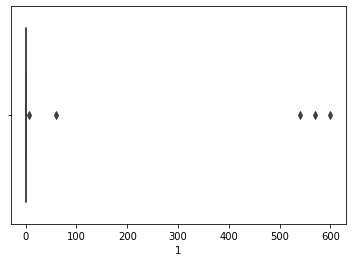

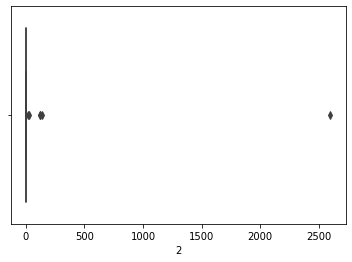

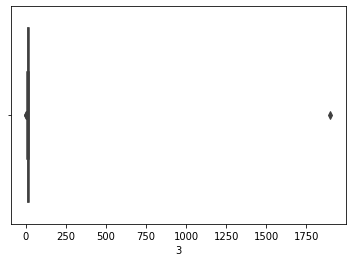

In [165]:
for i,e in enumerate (numerical_columns):
    plt.figure(i)
    sns.boxplot(dft[e])

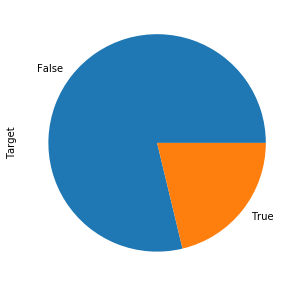

In [166]:
 plt.figure(figsize=(10,5))
dft['Target'].value_counts().plot(kind='pie')

In [167]:
dft['Target'].value_counts()

False    1557
True      420
Name: Target, dtype: int64

In [133]:
# imbalanced data

In [168]:
dft['Target'] = dft['Target'].apply(lambda x:1 if x==True else 0 )


In [169]:
dft.head()

,1,2,3,Target
0,0.60,0.31,13.0,0
1,0.74,0.33,21.0,0
4,0.77,0.15,15.0,1
5,0.46,0.17,18.0,0
6,0.49,0.26,10.0,0


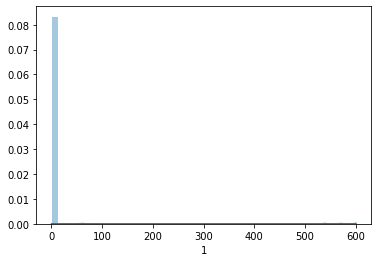

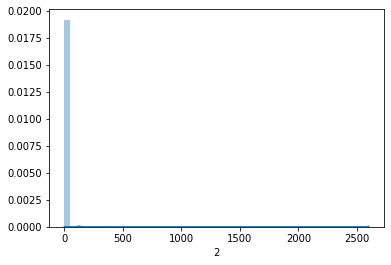

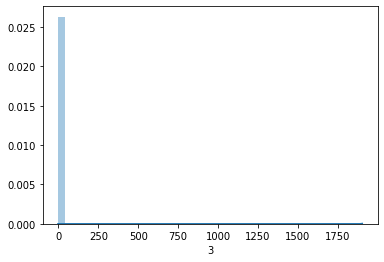

In [170]:
for i,e in enumerate(numerical_columns):
    plt.figure(i)
    sns.distplot(dft[e])
    plt.xlabel(e)

In [31]:
from scipy.stats import ttest_ind,shapiro,bartlett,levene,mannwhitneyu

In [32]:
for i in numerical_columns:
    print('P value is',(shapiro(dft[i])))

P value is (0.01891171932220459, 0.0)
P value is (0.008812665939331055, 0.0)
P value is (0.030084073543548584, 0.0)


In [33]:
# data is not following normal distribution as the p value is less than 0.05

In [171]:
x = dft.drop('Target',axis=1)
y = dft['Target']
print(x.shape)
print(y.shape)

(1977, 3)
(1977,)


In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1581, 3)
(396, 3)
(1581,)
(396,)


In [173]:
from statsmodels.tools import add_constant
df_constant = add_constant(dft)

C:\Users\sande\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [174]:
import statsmodels.api as sm

In [175]:
cols = df_constant.drop(['Target'],axis=1).columns

In [176]:
model = sm.Logit(dft['Target'],df_constant[cols])   
result = model.fit()
result.summary()

C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.343123
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 1977
Model:                          Logit   Df Residuals:                     1973
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Jun 2020   Pseudo R-squ.:                  0.3365
Time:                        15:16:38   Log-Likelihood:                -678.35
converged:                       True   LL-Null:                       -1022.5
Covariance Type:            nonrobust   LLR p-value:                7.588e-149
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5681      0.336     16.584      0.000       4.910       6.226
1             -0.0004      0.009     -0.051      0.959      -0.018       0.017
2             -0.0013      0.004     -0.296      0.767      -0.010       0.007
3             -0.5100      0.027    -18.941      0.000      -0.563      -0.457
==============================================================================
"""

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
DT = DecisionTreeClassifier(criterion='entropy',random_state=0)
DT1 = DecisionTreeClassifier(criterion='gini',random_state=0)


In [184]:
X = dft.drop('Target',axis=1)
Y = dft['Target']

In [185]:
from sklearn import model_selection

models = []
models.append(('Logistic',LR))
models.append(('FGDT',DT))  #FGDT - fully grown decision tree
models.append(('FGDTE',DT1))

Logistic : 0.879080 (0.000060)
FGDT : 0.949573 (0.000468)
FGDTE : 0.949413 (0.000416)


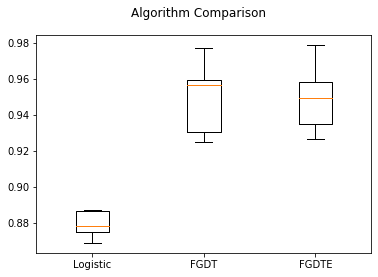

In [186]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 5, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv = kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    
# boxplot algorithm comparision-
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [188]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,random_state = 0)

In [189]:
models.append(('RandomForest',RF))

Logistic : 0.879080 (0.000060)
FGDT : 0.949573 (0.000468)
FGDTE : 0.949413 (0.000416)
RandomForest : 0.990733 (0.000035)


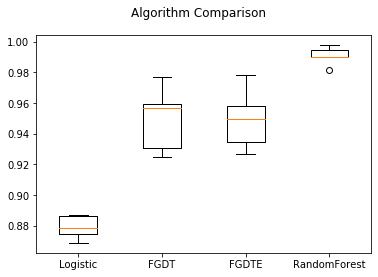

In [190]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 5, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv = kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    
# boxplot algorithm comparision-
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import metrics


In [193]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param = {'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS = GridSearchCV(knn,param,cv=3,scoring='roc_auc') # default scoring is accuracy, its not accrate for classification
GS.fit(X,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [194]:
GS.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [195]:
KNN_final = KNeighborsClassifier(n_neighbors=6,weights='distance')

In [196]:
models.append(('KNN_W',KNN_final))

Logistic : 0.880875 (0.000027)
FGDT : 0.941191 (0.000322)
FGDTE : 0.941198 (0.000705)
RandomForest : 0.987540 (0.000020)
KNN_W : 0.991772 (0.000065)


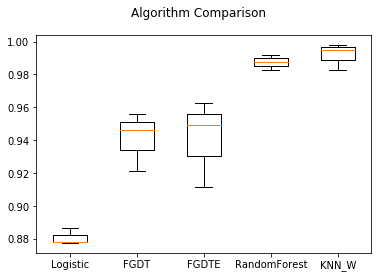

In [197]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv = kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    
# boxplot algorithm comparision-
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [200]:
DT = DecisionTreeClassifier(random_state=0)

from sklearn.model_selection import GridSearchCV

para_dt = {'criterion':['entropy','ginni']}
GS_dt = GridSearchCV(DT,para_dt,cv=5,scoring='roc_auc') 
GS_dt.fit(X,Y)

C:\Users\sande\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'ginni'

  FitFailedWarning)
C:\Users\sande\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'ginni'

  FitFailedWarning)
C:\Users\sande\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'ginni'

  FitFailedWarning)
C:\Users\sande\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'ginn

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'ginni']},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [201]:
GS_dt.best_params_

{'criterion': 'entropy'}

In [202]:
DT_md = DecisionTreeClassifier(criterion = 'entropy',random_state=0)

param_dt_maxdpth = ({'max_depth':np.arange(1,50)})
GS_md = GridSearchCV(DT_md,param_dt_maxdpth,cv=3,scoring = 'roc_auc')
GS_md.fit(X,Y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 

In [203]:
GS_md.best_params_

{'max_depth': 5}

In [204]:
DT_withmaxdepth = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth=5)

In [205]:
models.append(('DT_Pruned',DT_withmaxdepth))

Logistic : 0.880875 (0.000027)
FGDT : 0.941191 (0.000322)
FGDTE : 0.941198 (0.000705)
RandomForest : 0.987540 (0.000020)
KNN_W : 0.991772 (0.000065)
DT_Pruned : 0.961562 (0.000149)


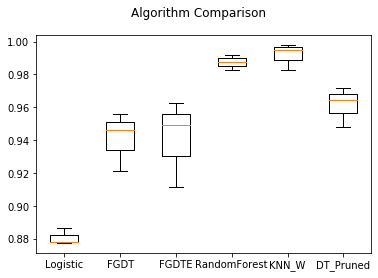

In [206]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 3, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv = kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
    
# boxplot algorithm comparision-
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [208]:
DT_withmaxdepth.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [210]:
yred =DT_withmaxdepth.predict(X_test)

In [213]:
from sklearn import metrics
cr = metrics.classification_report(y_test,yred)

In [214]:
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       316
           1       0.82      0.94      0.87        80

    accuracy                           0.94       396
   macro avg       0.90      0.94      0.92       396
weighted avg       0.95      0.94      0.95       396



In [216]:
df_test = pd.read_csv('cctech_class_test.txt')

In [218]:
df_test.head()

,1,2,3
0,0.74,0.21,22.0
1,0.43,0.15,14.0
2,0.77,0.10,15.0
3,0.57,0.31,15.0
4,0.80,0.31,20.0


In [217]:
df_test.isna().sum()

1    4
2    5
3    4
dtype: int64

In [219]:
df_test = df_test.dropna()

In [220]:
y_pred =DT_withmaxdepth.predict(df_test)

In [221]:
print(y_pred)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 

In [222]:
df_test['Result'] = y_pred

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
df_test

,1,2,3,Result
0,0.74,0.21,22.0,0
1,0.43,0.15,14.0,0
2,0.77,0.10,15.0,1
3,0.57,0.31,15.0,0
4,0.80,0.31,20.0,0
...,...,...,...,...
850,0.80,0.19,19.0,0
851,0.40,0.15,21.0,1
852,0.49,0.26,17.0,0
853,0.63,0.31,14.0,0


In [225]:
df_test['Result'] = df_test['Result'].apply(lambda x:True if x==1 else False )
df_test.head(10)

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,1,2,3,Result
0,0.74,0.21,22.0,False
1,0.43,0.15,14.0,False
2,0.77,0.10,15.0,True
3,0.57,0.31,15.0,False
4,0.80,0.31,20.0,False
5,0.66,0.12,18.0,False
6,0.77,0.14,20.0,False
7,0.77,0.35,15.0,False
8,0.80,0.24,170.0,False
9,0.60,0.35,13.0,False


In [227]:
df_test['Result'].value_counts()

False    650
True     194
Name: Result, dtype: int64